In [ ]:
#import required libraries to read the datafile
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# connect to database
conn = sqlite3.connect("RFM_DB")
cur = conn.cursor() 

# read csv file
df = pd.read_csv('/content/sample_data/Groceries_dataset (1).csv')

# load CRM data into the database
df.to_sql("data", conn,index=False)


38765

In [ ]:
#Check if there are any null Values
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
Cost               0
dtype: int64

In [ ]:
df.dtypes

Member_number        int64
Date                object
itemDescription     object
Cost               float64
dtype: object

In [ ]:
# Check and Read the data from the table
df_fact = pd.read_sql('SELECT * FROM data', conn)
df_fact

,Member_number,Date,itemDescription,Cost,Date_Format
0,1808,21-Jul-15,tropical fruit,5.0,42206
1,2552,05-Jan-15,whole milk,3.0,42009
2,2300,19-Sep-15,pip fruit,4.0,42266
3,1187,12-Dec-15,other vegetables,6.0,42350
4,3037,01-Feb-15,whole milk,3.0,42036
...,...,...,...,...,...
38760,4471,08-Oct-14,sliced cheese,5.0,41920
38761,2022,23-Feb-14,candy,11.0,41693
38762,1097,16-Apr-14,cake bar,11.0,41745
38763,1510,03-Dec-14,fruit/vegetable juice,11.0,41976


In [ ]:
# Check and Read the data from the table
Clean_data = pd.read_sql('''select x.Member_number,x.Date,x.Frequency,x.Total_Cost from
(SELECT 
Member_number,
Date,
sum(cost) as Total_Cost,
count(distinct Date) as Frequency,
max(Date_Format) as formatdate
FROM data
WHERE Member_number IS NOT NULL AND Date is not NULL
group by Member_number)x''', conn)

# Write clean CRM data into the database
Clean_data.to_sql("Clean_data", conn)

Clean_data

,Member_number,Date,Frequency,Total_Cost
0,1000,25-Nov-15,5,81.13
1,1001,02-May-15,5,51.89
2,1002,30-Aug-15,4,67.15
3,1003,10-Feb-15,4,38.49
4,1004,02-Dec-15,8,115.30
...,...,...,...,...
3893,4996,24-Nov-15,3,97.00
3894,4997,27-Dec-15,2,60.50
3895,4998,14-Oct-15,1,6.00
3896,4999,26-Dec-15,6,88.30


In [ ]:
Clean_data

,Member_number,Date,Frequency,Total_Cost
0,1000,25-Nov-15,5,81.13
1,1001,02-May-15,5,51.89
2,1002,30-Aug-15,4,67.15
3,1003,10-Feb-15,4,38.49
4,1004,02-Dec-15,8,115.30
...,...,...,...,...
3893,4996,24-Nov-15,3,97.00
3894,4997,27-Dec-15,2,60.50
3895,4998,14-Oct-15,1,6.00
3896,4999,26-Dec-15,6,88.30


In [ ]:
Clean_data.corr()

<ipython-input-5-3f0e48af481e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Clean_data.corr()


,Member_number,Frequency,Total_Cost
Member_number,1.000000,0.006844,0.010883
Frequency,0.006844,1.000000,0.806728
Total_Cost,0.010883,0.806728,1.000000


In [ ]:
Clean_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Member_number,3898.0,3002.959979,1155.806001,1000.0,1999.25,3004.50,4002.75,5000.0
Frequency,3898.0,3.838635,1.883678,1.0,2.00,4.00,5.00,11.0
Total_Cost,3898.0,75.107907,45.450551,3.6,40.00,67.65,101.43,310.3


<ipython-input-7-5a16784f430d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Clean_data['Frequency'])


Text(0, 0.5, 'Count')

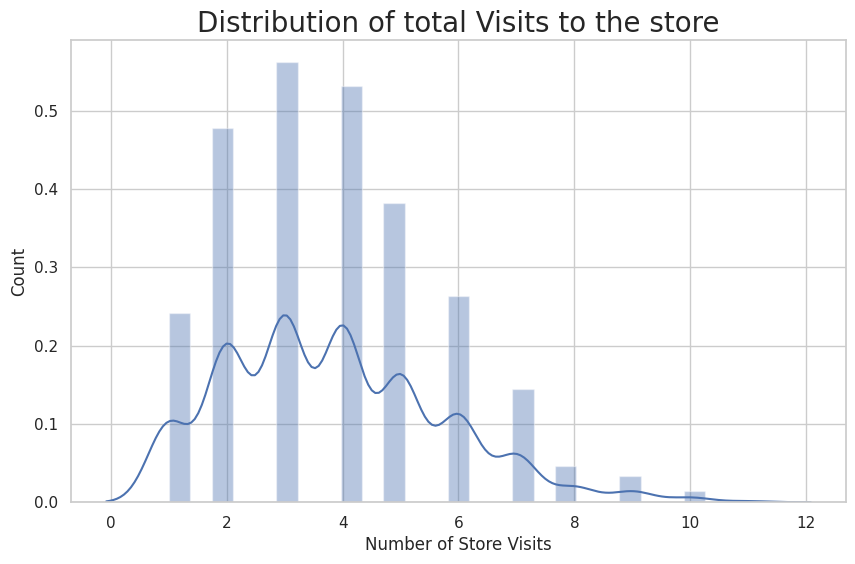

In [ ]:
#Distribution of Spending for each Member
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(Clean_data['Frequency'])
plt.title('Distribution of total Visits to the store', fontsize = 20)
plt.xlabel('Number of Store Visits')
plt.ylabel('Count')

<ipython-input-8-ae6c47f0267f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Clean_data['Total_Cost'])


Text(0, 0.5, 'Count')

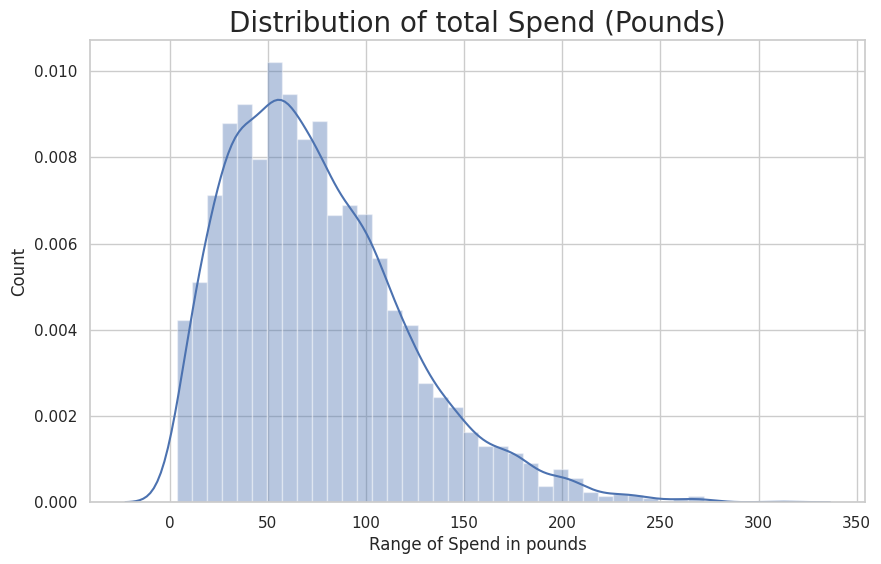

In [ ]:
#Distribution of Spending for each Member
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(Clean_data['Total_Cost'])
plt.title('Distribution of total Spend (Pounds)', fontsize = 20)
plt.xlabel('Range of Spend in pounds')
plt.ylabel('Count')

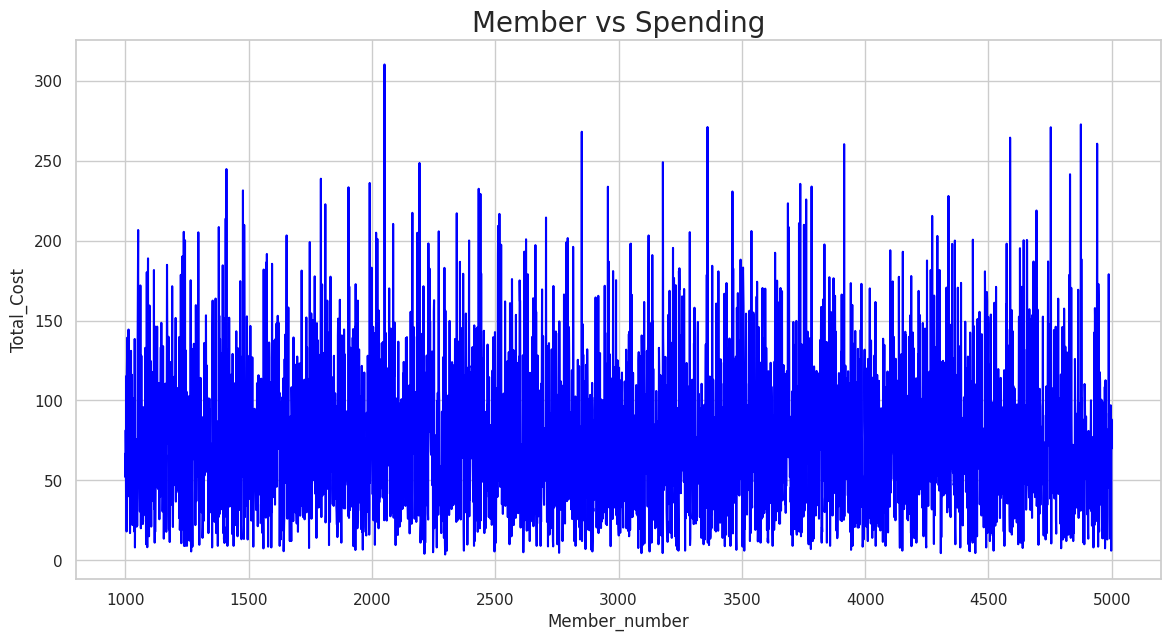

In [ ]:
#Member vs Spending:
plt.figure(figsize=(14,7))
# Group variable using "hue" that will produce lines with different colors
sns.lineplot(x="Member_number",y="Total_Cost",color = 'blue',data=Clean_data)
plt.title('Member vs Spending', fontsize = 20)
plt.show()

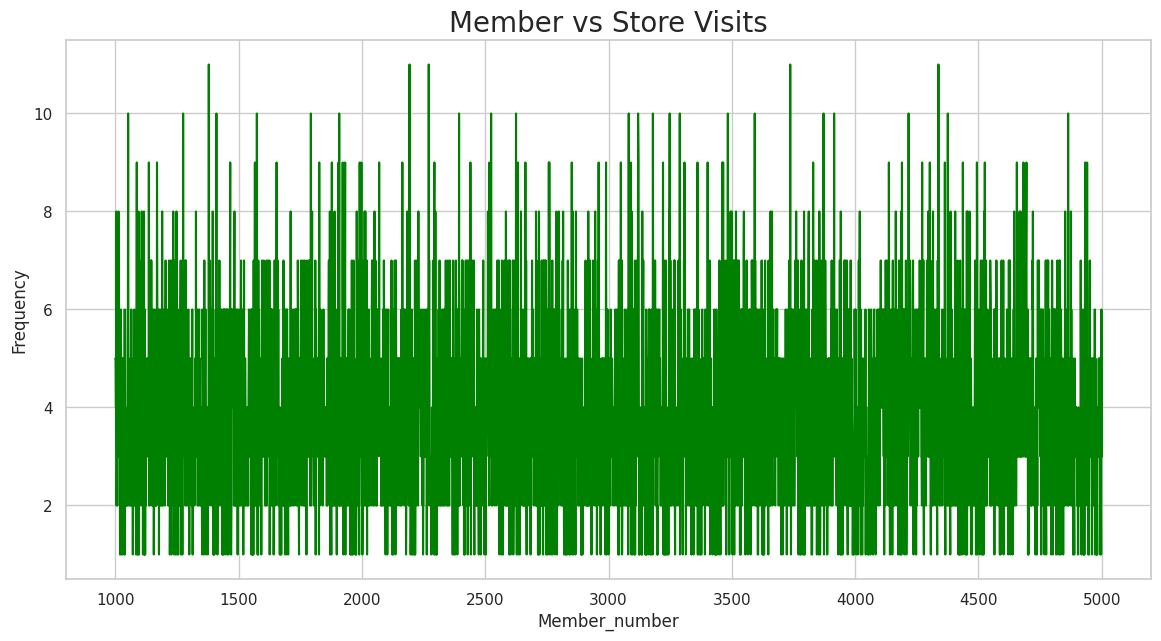

In [ ]:
#Member vs Store visits
plt.figure(figsize=(14,7))
sns.lineplot(x="Member_number",y="Frequency",color = 'Green',data=Clean_data)
plt.title('Member vs Store Visits', fontsize = 20)
plt.show()

In [ ]:
Clean_data.dtypes
Clean_data['Date'] = pd.to_datetime(Clean_data['Date'],errors='coerce')
Clean_data.dtypes

Member_number             int64
Date             datetime64[ns]
Frequency                 int64
Total_Cost              float64
dtype: object

In [ ]:
Clean_data

,Member_number,Date,Frequency,Total_Cost
0,1000,2015-11-25,5,81.13
1,1001,2015-05-02,5,51.89
2,1002,2015-08-30,4,67.15
3,1003,2015-02-10,4,38.49
4,1004,2015-12-02,8,115.30
...,...,...,...,...
3893,4996,2015-11-24,3,97.00
3894,4997,2015-12-27,2,60.50
3895,4998,2015-10-14,1,6.00
3896,4999,2015-12-26,6,88.30


In [ ]:
import numpy as np
import datetime
# Create snapshot date
snapshot_date = Clean_data['Date'].max() + datetime.timedelta(days=1)
print(snapshot_date)
# Aggregate data by each member
member = Clean_data.groupby(['Member_number']).agg({
   'Date': lambda x: (snapshot_date - x.max()).days,
   'Frequency':'sum' ,
   'Total_Cost': 'sum'})

2015-12-31 00:00:00


In [ ]:
# Rename columns
member.rename(columns = {'Date': 'Recency',
                            'Frequency': 'Frequency',
                            'Total_Cost': 'MonetaryValue'}, inplace=True)

In [ ]:
member

,Recency,Frequency,MonetaryValue
Member_number,,,
1000,36,5,81.13
1001,243,5,51.89
1002,123,4,67.15
1003,324,4,38.49
1004,29,8,115.30
...,...,...,...
4996,37,3,97.00
4997,4,2,60.50
4998,78,1,6.00


Text(0.5, 1.0, 'Histogram for Recency')

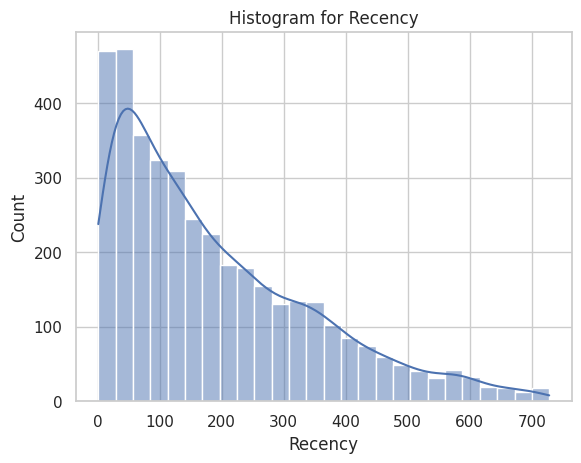

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.histplot(data=member, x='Recency', kde=True)
ax.set_title('Histogram for Recency')

Text(0.5, 1.0, 'Histogram for Frequency')

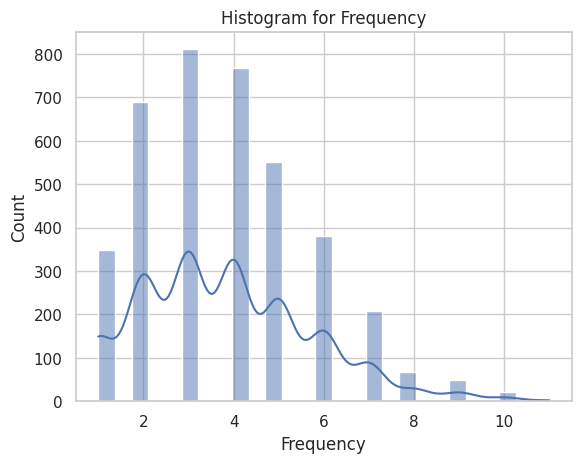

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.histplot(data=member, x='Frequency', kde=True)
ax.set_title('Histogram for Frequency')

Text(0.5, 1.0, 'Histogram for MonetaryValue')

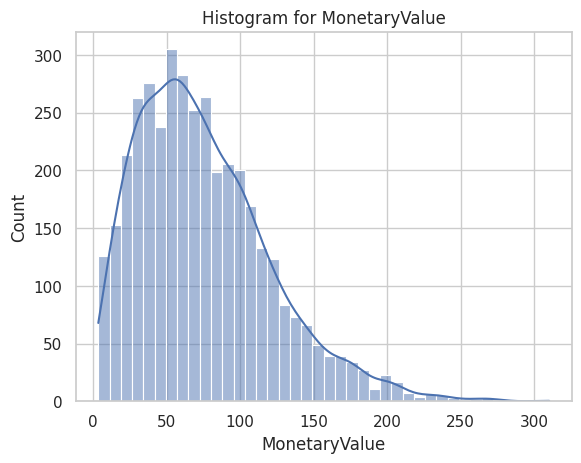

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.histplot(data=member, x='MonetaryValue', kde=True)
ax.set_title('Histogram for MonetaryValue')

<ipython-input-19-39d00eeb81cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(member['Recency'])
<ipython-input-19-39d00eeb81cf>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(member['Frequency'])
<ipython-input-19-39d00eeb81cf>:8: UserWarning: 



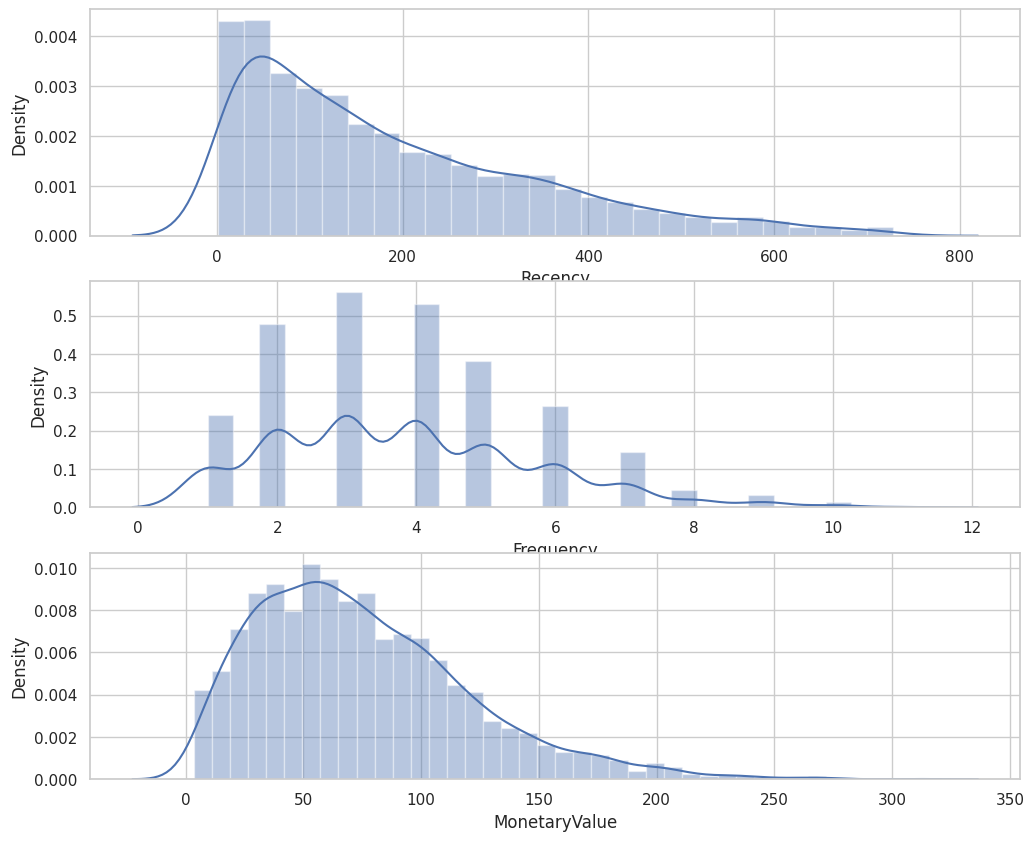

In [ ]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(member['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(member['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(member['MonetaryValue'])
# Show the plot
plt.show()

In [ ]:
from scipy import stats
member_fix = pd.DataFrame()
member_fix["Recency"] = stats.boxcox(member['Recency'])[0]
member_fix["Frequency"] = stats.boxcox(member['Frequency'])[0]
member_fix["MonetaryValue"] = stats.boxcox(member['MonetaryValue'])[0]
member_fix.tail()

,Recency,Frequency,MonetaryValue
3893,7.016236,1.412097,13.245915
3894,1.763905,0.810273,10.515230
3895,9.852175,0.000000,2.630218
3896,2.132343,2.725071,12.660029
3897,17.690836,1.412097,11.304003


<ipython-input-21-efbbce06e839>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(member_fix['Recency'])
<ipython-input-21-efbbce06e839>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(member_fix['Frequency'])
<ipython-input-21-efbbce06e839>:8: UserWar

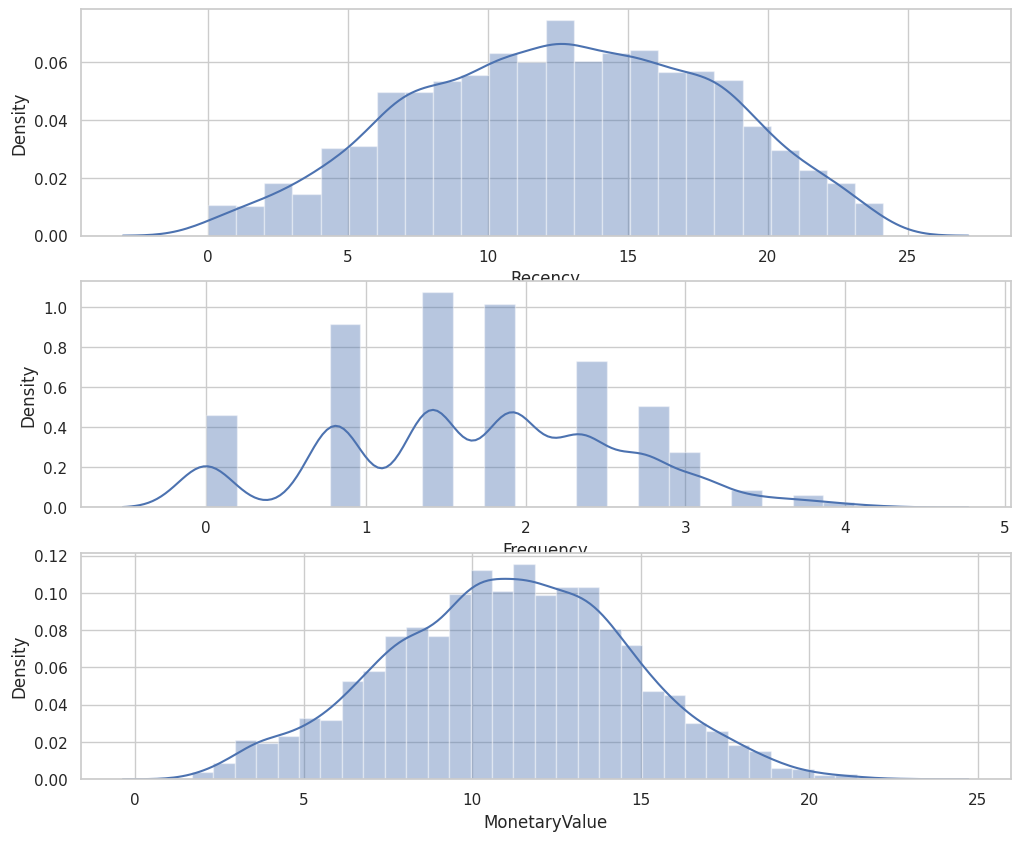

In [ ]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(member_fix['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(member_fix['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(member_fix['MonetaryValue'])
# Show the plot
plt.show()

In [ ]:
# Import library
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(member_fix)
member_normalized = scaler.transform(member_fix)
# Assert that it has mean 0 and variance 1
print(member_normalized.mean(axis = 0).round(2)) # [0. -0. 0.]
print(member_normalized.std(axis = 0).round(2)) # [1. 1. 1.]

[ 0. -0. -0.]
[1. 1. 1.]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

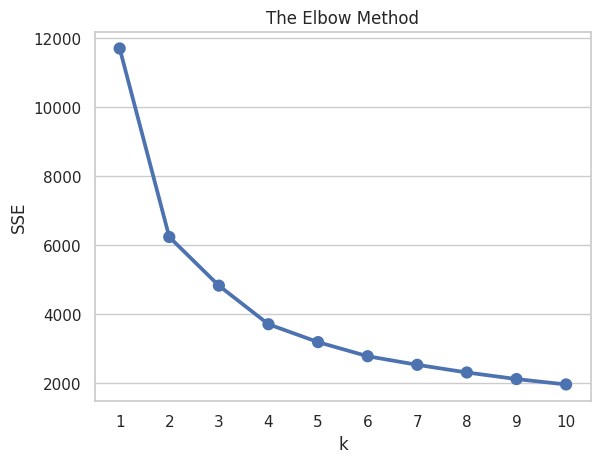

In [ ]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(member_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

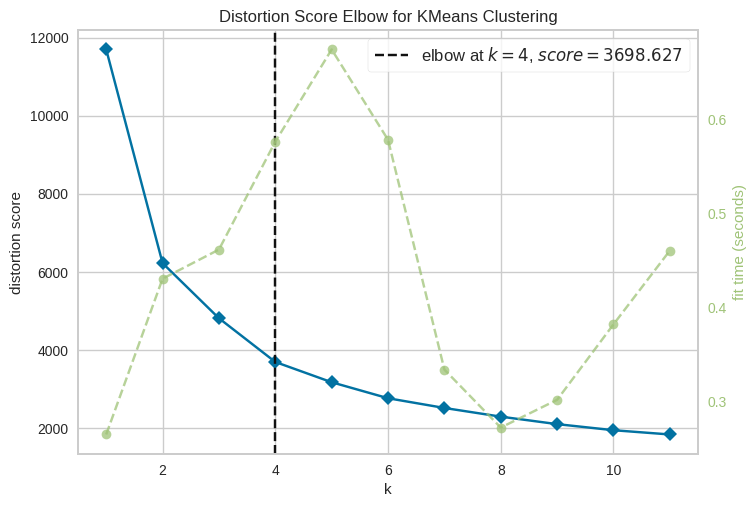

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(member_normalized)  
visualizer.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Recency,Frequency,MonetaryValue
Cluster,,,
0,1128,1128,1128
1,913,913,913
2,974,974,974
3,883,883,883


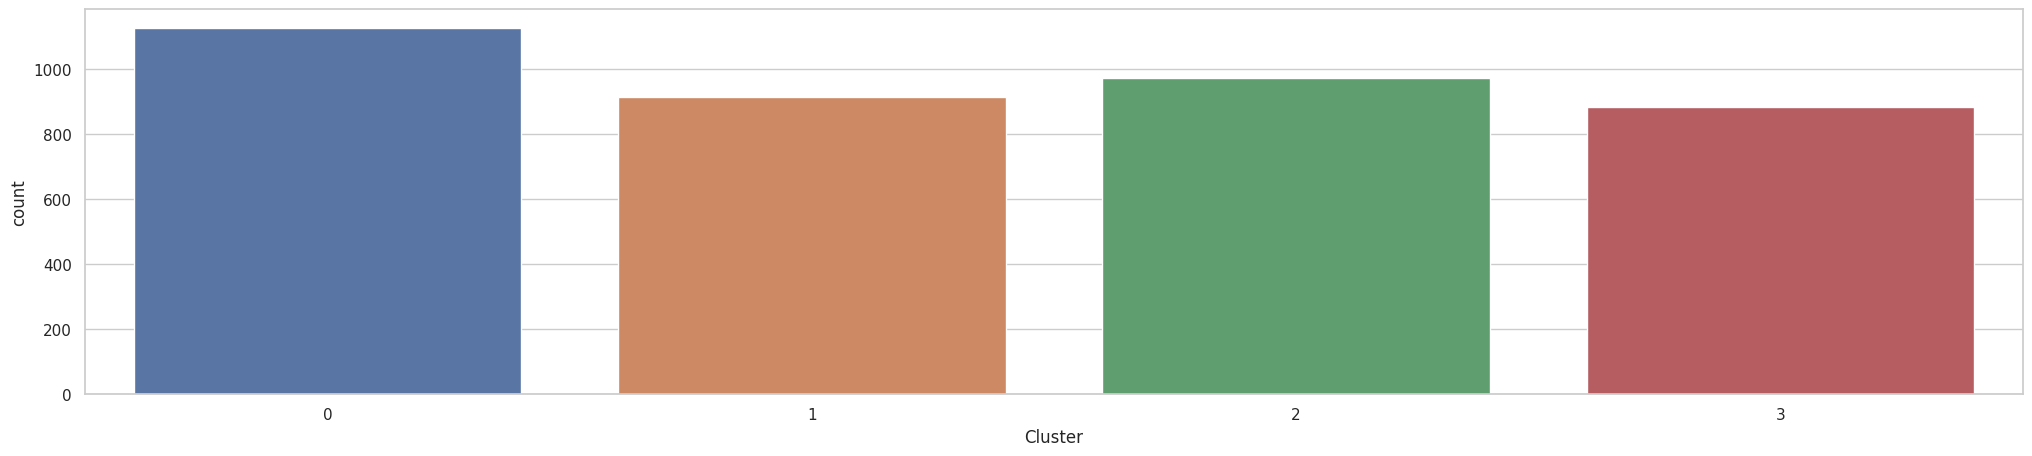

In [ ]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(member_normalized)
model.labels_.shape
member["Cluster"] = model.labels_
member.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="Cluster", data=member)
member.groupby(['Cluster']).count()

In [ ]:
member["Cluster"] = model.labels_
member.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0        253.81      3.91         76.76  1128
1        354.08      1.76         28.34   913
2         79.34      6.21        132.15   974
3         55.16      3.28         58.43   883

In [ ]:
member

,Recency,Frequency,MonetaryValue,Cluster
Member_number,,,,
1000,36,5,81.13,2
1001,243,5,51.89,0
1002,123,4,67.15,0
1003,324,4,38.49,0
1004,29,8,115.30,2
...,...,...,...,...
4996,37,3,97.00,3
4997,4,2,60.50,3
4998,78,1,6.00,1


<Axes: xlabel='Attribute', ylabel='Value'>

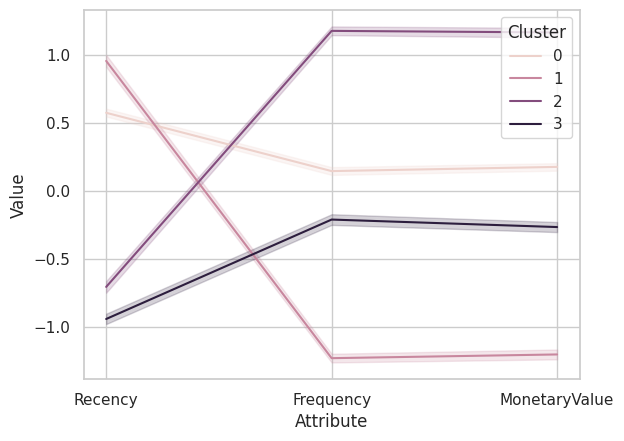

In [ ]:
# Create the dataframe
df_normalized = pd.DataFrame(member_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = member.index
df_normalized['Cluster'] = model.labels_
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it
sns.lineplot(x = 'Attribute', y= 'Value', hue='Cluster', data=df_nor_melt)

In [ ]:
df_nor_melt

,ID,Cluster,Attribute,Value
0,1000,2,Recency,-1.083711
1,1001,0,Recency,0.588682
2,1002,0,Recency,-0.132977
3,1003,0,Recency,0.946600
4,1004,2,Recency,-1.214202
...,...,...,...,...
11689,4996,3,MonetaryValue,0.620345
11690,4997,3,MonetaryValue,-0.147685
11691,4998,1,MonetaryValue,-2.365416
11692,4999,2,MonetaryValue,0.455559


In [ ]:
member.head(20)

,Recency,Frequency,MonetaryValue,Cluster
Member_number,,,,
1000,36,5,81.13,2
1001,243,5,51.89,0
1002,123,4,67.15,0
1003,324,4,38.49,0
1004,29,8,115.30,2
1005,707,2,18.00,1
1006,200,4,115.39,0
1008,89,2,139.30,3
1009,87,4,55.30,3


In [ ]:
cust0=df_nor_melt[df_nor_melt["Cluster"]==0]
print('Number of customer in 3rd group=', len(cust0))
print(list(cust0["ID"].values))
print("--------------------------------------------")
cust1=df_nor_melt[df_nor_melt["Cluster"]==1]
print('Number of customer in 1st group=', len(cust1))
print(list(cust1["ID"].values))
print("--------------------------------------------")
cust2=df_nor_melt[df_nor_melt["Cluster"]==2]
print('Number of customer in 2nd group=', len(cust2))
print(list(cust2["ID"].values))
print("--------------------------------------------")
cust3=df_nor_melt[df_nor_melt["Cluster"]==3]
print('Number of customer in 4th group=', len(cust3))
print(list(cust3["ID"].values))
print("--------------------------------------------")

Number of customer in 3rd group= 3384
[1001, 1002, 1003, 1006, 1010, 1015, 1017, 1018, 1025, 1026, 1027, 1028, 1033, 1041, 1043, 1053, 1055, 1057, 1064, 1066, 1067, 1069, 1081, 1083, 1100, 1101, 1102, 1103, 1108, 1109, 1113, 1115, 1126, 1128, 1129, 1130, 1133, 1134, 1135, 1139, 1140, 1141, 1142, 1143, 1147, 1152, 1154, 1159, 1168, 1171, 1174, 1183, 1185, 1186, 1188, 1194, 1198, 1202, 1206, 1209, 1211, 1212, 1213, 1215, 1216, 1217, 1229, 1232, 1240, 1241, 1244, 1246, 1252, 1254, 1261, 1268, 1270, 1274, 1280, 1281, 1285, 1291, 1294, 1295, 1297, 1298, 1299, 1305, 1307, 1308, 1309, 1311, 1312, 1316, 1319, 1320, 1325, 1328, 1329, 1334, 1336, 1342, 1345, 1346, 1347, 1353, 1356, 1364, 1369, 1370, 1371, 1372, 1373, 1374, 1376, 1377, 1381, 1386, 1388, 1389, 1390, 1392, 1393, 1398, 1399, 1403, 1405, 1408, 1413, 1417, 1419, 1426, 1428, 1432, 1434, 1435, 1457, 1460, 1478, 1479, 1489, 1492, 1495, 1500, 1501, 1503, 1512, 1514, 1517, 1522, 1523, 1529, 1534, 1535, 1542, 1544, 1546, 1547, 1548, 1549, 1